<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/MMI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
#plt.style.use('seaborn-whitegrid')
'''
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 2
plt.rcParams['grid.color'] = "#cccccc"
'''

'\nplt.rcParams[\'axes.facecolor\'] = \'white\'\nplt.rcParams[\'axes.edgecolor\'] = \'white\'\nplt.rcParams[\'axes.grid\'] = True\nplt.rcParams[\'grid.alpha\'] = 2\nplt.rcParams[\'grid.color\'] = "#cccccc"\n'

In [5]:
nifty = pd.read_csv('/content/MMI_2022-01-01.csv')
#nifty = pd.read_csv('/content/a.csv')
colnames= ['Date','MMI','Nifty']
nifty.columns=colnames


In [6]:
nifty.head(2)

,Date,MMI,Nifty
0,31/12/2021,63.256005,17354.05
1,30/12/2021,57.055673,17203.95


In [7]:
#data = pd.DataFrame({'Date':['29/12/2021','28/12/2021','27/12/2021'] ,'MMI': [54.56,42.64,35.43],'Nifty':[17213,17233,17130]})

In [8]:
#nifty= pd.concat([data,nifty],axis=0)
nifty.head(3)

,Date,MMI,Nifty
0,31/12/2021,63.256005,17354.05
1,30/12/2021,57.055673,17203.95
2,29/12/2021,54.428337,17213.60


In [9]:
#len(nifty)

In [10]:
#nifty = nifty.iloc[1200:]

In [11]:
nifty['Date']=pd.to_datetime(nifty['Date'],format='%d/%m/%Y')

In [12]:
nifty.head(5)

,Date,MMI,Nifty
0,2021-12-31,63.256005,17354.05
1,2021-12-30,57.055673,17203.95
2,2021-12-29,54.428337,17213.60
3,2021-12-28,42.642083,17233.25
4,2021-12-27,35.431692,17086.25


In [13]:
#if TypeError:
#    nifty['Date']=pd.to_datetime(nifty['Date'],format='%d-%m-%Y')
#else:
#    nifty['Date']=pd.to_datetime(nifty['Date'],format='%d/%m/%Y')  

In [14]:
nifty= nifty.set_index('Date')

In [15]:
#nifty.drop(nifty.index[1500:], inplace=True)

In [16]:
nifty = nifty.loc[~nifty.index.duplicated(keep='first')]

In [ ]:
nifty['macd']=nifty['MMI'][::-1].ewm(span=50, adjust=False).mean()-nifty['MMI'][::-1].ewm(span=200, adjust=False).mean()
nifty['signal']=nifty['macd'].ewm(span=35,adjust=False).mean()
nifty['signal10']=nifty['macd'].ewm(span=10,adjust=False).mean()

In [ ]:
nifty['45 Day'] = nifty['MMI'][::-1].rolling(window=45).mean()
nifty['20 Day'] = nifty['MMI'][::-1].rolling(window=20).mean()
nifty['50ema'] = nifty['Nifty'][::-1].ewm(span=50,adjust=False).mean()

# MMI Plot Vs Nifty

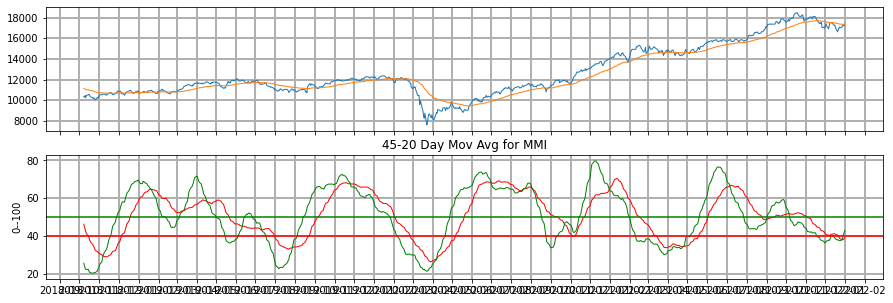

In [19]:
from matplotlib.dates import MonthLocator, YearLocator
t=800
fig, ax = plt.subplots(2,1,figsize=(15,5),sharex=True)

ax[0].plot(nifty.index.values[:t],nifty['Nifty'].values[:t],linewidth=1 )
ax[0].plot(nifty.index.values[:t],nifty['50ema'].values[:t],linewidth=1 )
ax[1].plot(nifty.index.values[:t],nifty['45 Day'].values[:t],color='r',linewidth=1 )
ax[1].plot(nifty.index.values[:t],nifty['20 Day'].values[:t],color= 'g',linewidth=1 )
ax[1].axhline(y=50 , color= 'g')
ax[1].axhline(y=40 , color= 'r')
plt.title('45-20 Day Mov Avg for MMI')
plt.ylabel('0--100')
#fig.savefig('test2png.png', dpi=150)
yloc = YearLocator()
mloc = MonthLocator()
ax[0].xaxis.set_major_locator(mloc)
ax[1].xaxis.set_major_locator(mloc)
#ax[2].xaxis.set_major_locator(mloc)
ax[0].grid(linewidth =2)
ax[1].grid(linewidth =2)
#ax[2].grid(linewidth =2)
plt.show()

In [20]:
def plot_buy_sell_signal(df):
  signal=[]
  for i in range(len(df)):
   
    if df['20 Day'].iloc[i]<df['45 Day'].iloc[i] and df['20 Day'].iloc[i]<40 :
      signal.append(i)
    
  return signal

In [21]:
def draw_plot(labels,df,t=500):
  
  df=df[:t]
  buy=plot_buy_sell_signal(df)
  fig, ax = plt.subplots(2,1, figsize=(15,9),sharex=True)
  ax[0].plot(df.loc[:, :].index, df.loc[:, 'Nifty'], label='Nifty')
  ax[0].plot(df.loc[:, :].index, df.loc[:, '50ema'], label='50 ema')
  ax[1].plot(df.loc[:, :].index, df.loc[:, 'Nifty'], label='Nifty')
  ax[1].scatter(df.iloc[buy].index,df.iloc[buy].Nifty,marker='.',label='Volatile',color='r')
  ax[0].legend(loc='upper left')
  ax[0].set_ylabel(labels)
  ax[1].legend('MMI-Regime ')
  ax[1].legend(loc='upper left')
  
  
  fig.suptitle(labels)
  plt.show()

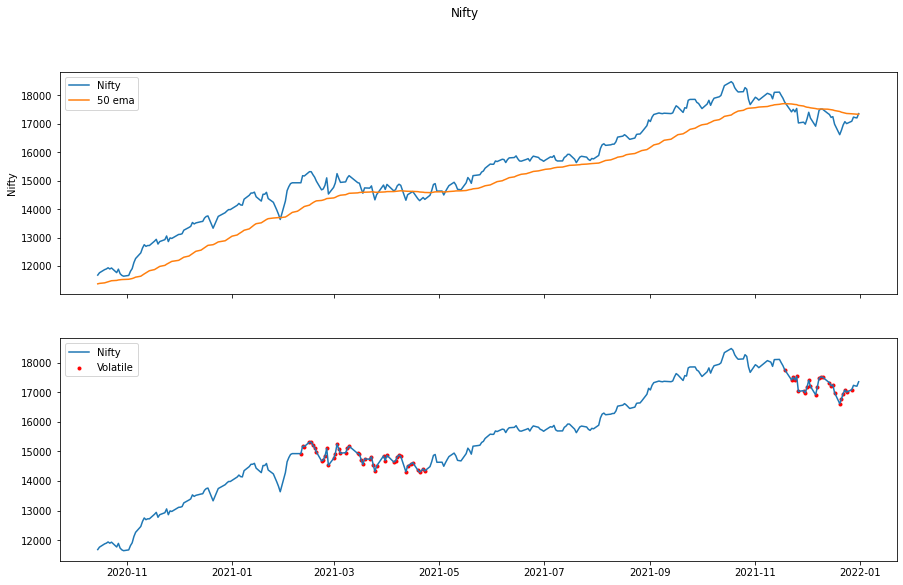

In [22]:
draw_plot('Nifty',nifty,300)

In [23]:
buy=plot_buy_sell_signal(nifty)

In [24]:
nifty.iloc[buy[0]].name

Timestamp('2021-12-27 00:00:00')